# 0. Libraries

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

# 1. read the csv-file

In [2]:
song_2019 =pd.read_csv('SpotifyAudioFeaturesApril2019.csv')

In [3]:
song_2019.head()

NameError: name 'song_2019' is not defined

- drop three columns, because there are categorical columns and they do not need for the KMeans

In [4]:
song_2019_modified = song_2019.drop(["artist_name", "track_id", "track_name"], axis = 1)

In [5]:
song_2019_modified

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [6]:
X = song_2019_modified

# 3. Apply the StandardScaler

In [7]:
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [8]:
X_prep = StandardScaler().fit_transform(X)

# 4. unsupervised learning

In [9]:
X_prep_df = pd.DataFrame(X_prep, columns=song_2019_modified.columns)

In [10]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep_df)

KMeans(random_state=1234)

In [11]:
kmeans.cluster_centers_

array([[ 1.57654939e+00, -1.33659700e+00,  3.22448657e-01,
        -1.62073700e+00,  1.44847784e+00, -9.25948506e-02,
        -3.03717645e-01, -1.94724637e+00,  6.50036986e-02,
        -4.87969244e-01, -5.31428062e-01, -1.66687330e-01,
        -8.75723787e-01, -4.44342452e-01],
       [-5.15567077e-01,  1.65945156e-01, -6.54444231e-02,
         3.12593519e-01,  1.64851545e+00,  4.95152217e-03,
        -2.19354716e-01, -8.53584940e-03, -7.31767133e-02,
        -3.52823186e-01,  2.27413050e-01,  1.44434196e-01,
        -4.69901119e-02, -4.60399714e-01],
       [ 1.05905447e+00, -2.82921773e-01, -3.63273292e-02,
        -8.89808148e-01, -3.89457790e-01, -3.47442207e-02,
        -2.96720614e-01, -2.43307168e-01,  3.64185701e-01,
        -4.57588088e-01, -2.20170669e-01, -3.97294518e-02,
        -3.11628210e-01,  4.44481983e-02],
       [-4.73219552e-01,  3.83742890e-01,  3.25937193e-03,
         4.76712701e-01, -5.37708913e-01,  2.65594779e-01,
        -1.72229413e-01,  5.16217766e-01, -1.

In [12]:
kmeans.inertia_

1115365.7909153183

In [13]:
clusters = kmeans.predict(X_prep)
clusters

array([5, 5, 3, ..., 3, 3, 4])

In [14]:
pd.Series(clusters).value_counts().sort_index()

0    15144
1    14987
2    16946
3    26967
4    33938
5    12974
6     7660
7     2047
dtype: int64

In [15]:
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,cluster
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15,5
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0,5
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,3
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,1
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,1


<AxesSubplot:ylabel='Frequency'>

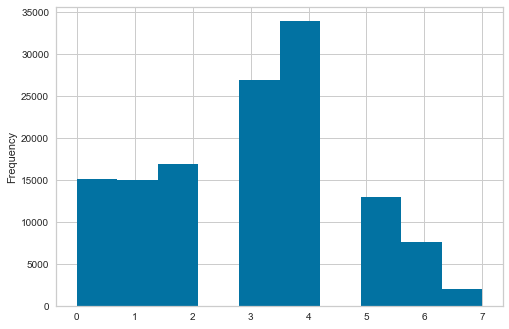

In [16]:
X_df['cluster'].plot(kind='hist')

Text(0, 0.5, 'inertia')

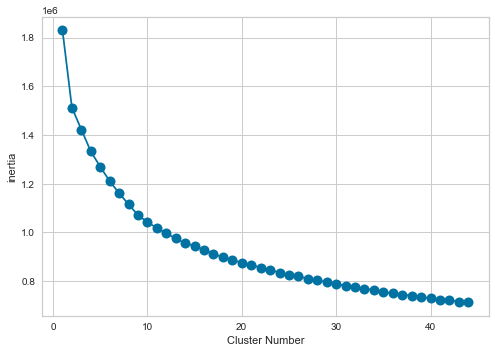

In [17]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1234,
                    n_init=3,
                    #algorithm='elkan',
                   )
    # train the model
    kmeans.fit(X_prep_df)
    
    # return the resulting inertia
    return kmeans.inertia_

# Plot for a range of cluster numbers
import matplotlib.pyplot as plt

cluster_range = range(1,45)

plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         marker="o",
         ms=10,
        )
plt.xlabel('Cluster Number')
plt.ylabel('inertia')

Text(0, 0.5, 'inertia')

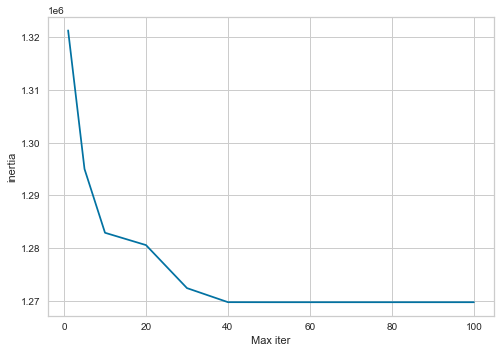

In [18]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=5,
                    random_state=1234,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

In [1]:
K = range(2, 41)

silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

NameError: name 'KMeans' is not defined

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

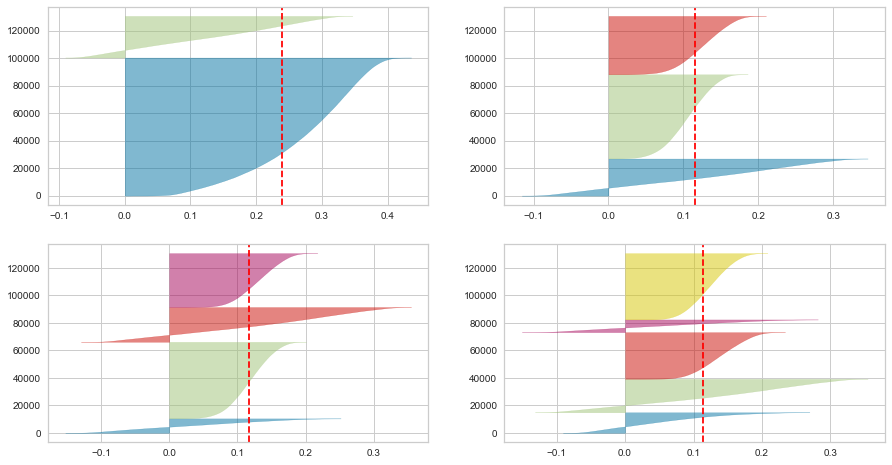

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2:41]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k,
                random_state=1234)
    q, mod = divmod(k, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_prep)

# 5. Visualisation

In [20]:
kmeans = KMeans(n_clusters=40,
             random_state=1234)

kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
clusters

array([ 2,  2, 25, ..., 24, 30,  8])

In [25]:
len(clusters)

130663

In [26]:
X_prep.shape

(130663, 14)

In [27]:
song_2019_modified.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity',
       'cluster'],
      dtype='object')

In [28]:
song_clustered = pd.DataFrame(X_prep, columns=['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'])

In [29]:
song_clustered['cluster_id'] = clusters

In [30]:
song_clustered['cluster_id'].value_counts()

25    6070
31    5720
38    5272
39    5242
7     5101
17    4944
29    4860
8     4666
30    4631
36    4487
18    4373
2     4322
4     4055
1     3862
10    3843
21    3825
24    3793
3     3588
0     3509
22    3482
37    3437
35    3355
33    3233
32    3113
15    2923
23    2837
28    2782
19    2629
5     2539
11    2493
12    2416
16    2387
6     2090
20    1208
13    1154
34     924
14     794
27     338
26     301
9       65
Name: cluster_id, dtype: int64

In [31]:
kmeans.cluster_centers_

array([[ 1.55730378e+00, -1.65502939e+00, -2.25799485e-01,
        -1.75306980e+00,  1.79683287e+00, -2.21192817e-01,
        -3.76465702e-01, -2.32481121e+00,  8.03394804e-01,
        -5.15530910e-01, -1.18518807e+00, -1.65409347e-01,
        -1.16665985e+00, -3.60272302e-01],
       [-7.96261300e-01, -2.71374092e-01,  3.02444174e-01,
         6.82217900e-01,  1.61440905e+00, -2.60434484e-01,
        -5.84947928e-02,  1.96147330e-01,  8.03394804e-01,
        -4.05855689e-01,  3.14584372e-01,  1.26020536e-01,
        -8.24352863e-01, -3.02580991e-01],
       [-4.53929236e-01,  7.65913257e-01, -2.34091402e-01,
         1.56127682e-01, -5.40698204e-01, -4.06466498e-01,
        -1.19175354e-01,  2.64362060e-01,  8.03394804e-01,
         1.95836875e+00,  8.94435733e-01,  2.40198049e-01,
         1.12920894e-01, -1.43094157e-01],
       [ 1.01035840e+00, -1.08534010e-01, -8.78646430e-03,
        -7.72647313e-01, -4.85352226e-01,  2.83524526e-01,
        -3.17095018e-01, -1.71970000e-01, -1.

In [35]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'])

In [36]:
cluster_centers_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,1.557304,-1.655029,-0.225799,-1.753070,1.796833,-0.221193,-0.376466,-2.324811,0.803395,-0.515531,-1.185188,-0.165409,-1.166660,-0.360272
1,-0.796261,-0.271374,0.302444,0.682218,1.614409,-0.260434,-0.058495,0.196147,0.803395,-0.405856,0.314584,0.126021,-0.824353,-0.302581
2,-0.453929,0.765913,-0.234091,0.156128,-0.540698,-0.406466,-0.119175,0.264362,0.803395,1.958369,0.894436,0.240198,0.112921,-0.143094
3,1.010358,-0.108534,-0.008786,-0.772647,-0.485352,0.283525,-0.317095,-0.171970,-1.244718,-0.369785,-0.295691,0.223332,-0.444113,0.132575
4,-0.159553,0.329523,-0.226313,0.221636,-0.553753,0.109311,0.038911,0.250822,-0.142082,2.137820,-1.101336,0.242446,0.314373,-0.131957
5,0.962799,-0.702793,0.083537,-0.892834,-0.468174,-0.081312,-0.263656,-0.145878,0.428297,-0.521463,0.336411,-1.705694,-0.456989,-0.053557
6,1.650611,-1.462777,2.596537,-1.663190,1.284525,-0.068351,-0.312666,-1.776220,0.280097,-0.534002,-0.521373,-0.144249,-1.032680,-0.570620
7,-0.348829,0.739256,-0.068283,0.618143,-0.558530,0.738743,-0.176574,0.577539,0.803395,-0.247343,-0.240352,0.104152,1.260707,-0.339411
8,-0.398282,0.707093,-0.065204,0.641943,-0.548443,-1.119028,-0.151477,0.583790,0.803395,-0.203764,-0.145332,0.126510,1.209202,-0.246193
9,0.263887,-0.461147,25.343540,-0.091099,0.051323,0.076553,1.128269,-0.485272,0.330753,1.452123,-0.723785,-0.303089,-0.312481,-0.372719


In [37]:
cluster_centers_df['cluster_id'] = range(0,40)

In [38]:
cluster_centers_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,cluster_id
0,1.557304,-1.655029,-0.225799,-1.753070,1.796833,-0.221193,-0.376466,-2.324811,0.803395,-0.515531,-1.185188,-0.165409,-1.166660,-0.360272,0
1,-0.796261,-0.271374,0.302444,0.682218,1.614409,-0.260434,-0.058495,0.196147,0.803395,-0.405856,0.314584,0.126021,-0.824353,-0.302581,1
2,-0.453929,0.765913,-0.234091,0.156128,-0.540698,-0.406466,-0.119175,0.264362,0.803395,1.958369,0.894436,0.240198,0.112921,-0.143094,2
3,1.010358,-0.108534,-0.008786,-0.772647,-0.485352,0.283525,-0.317095,-0.171970,-1.244718,-0.369785,-0.295691,0.223332,-0.444113,0.132575,3
4,-0.159553,0.329523,-0.226313,0.221636,-0.553753,0.109311,0.038911,0.250822,-0.142082,2.137820,-1.101336,0.242446,0.314373,-0.131957,4
5,0.962799,-0.702793,0.083537,-0.892834,-0.468174,-0.081312,-0.263656,-0.145878,0.428297,-0.521463,0.336411,-1.705694,-0.456989,-0.053557,5
6,1.650611,-1.462777,2.596537,-1.663190,1.284525,-0.068351,-0.312666,-1.776220,0.280097,-0.534002,-0.521373,-0.144249,-1.032680,-0.570620,6
7,-0.348829,0.739256,-0.068283,0.618143,-0.558530,0.738743,-0.176574,0.577539,0.803395,-0.247343,-0.240352,0.104152,1.260707,-0.339411,7
8,-0.398282,0.707093,-0.065204,0.641943,-0.548443,-1.119028,-0.151477,0.583790,0.803395,-0.203764,-0.145332,0.126510,1.209202,-0.246193,8
9,0.263887,-0.461147,25.343540,-0.091099,0.051323,0.076553,1.128269,-0.485272,0.330753,1.452123,-0.723785,-0.303089,-0.312481,-0.372719,9


In [48]:
# this contains my cluster centers
cluster_center_sub_df = cluster_centers_df[['tempo', 'danceability', 'instrumentalness' , 'cluster_id']]

# this cointains my datapoints with the determined
wines_clustered_sub_df= song_clustered[['tempo', 'danceability', 'instrumentalness' , 'cluster_id']]

In [49]:
cluster_center_sub_df

,tempo,danceability,instrumentalness,cluster_id
0,-1.185188,-1.655029,1.796833,0
1,0.314584,-0.271374,1.614409,1
2,0.894436,0.765913,-0.540698,2
3,-0.295691,-0.108534,-0.485352,3
4,-1.101336,0.329523,-0.553753,4
5,0.336411,-0.702793,-0.468174,5
6,-0.521373,-1.462777,1.284525,6
7,-0.240352,0.739256,-0.558530,7
8,-0.145332,0.707093,-0.548443,8
9,-0.723785,-0.461147,0.051323,9


In [50]:
wines_clustered_sub_df

,tempo,danceability,instrumentalness,cluster_id
0,2.800232,0.849826,-0.621709,2
1,1.310884,1.391714,-0.621709,2
2,-0.149450,0.113279,-0.621709,25
3,0.117033,1.149706,1.909328,28
4,0.019020,1.060268,1.814969,35
...,...,...,...,...
130658,0.383814,0.102757,-0.621709,39
130659,-0.843327,-1.023108,-0.621709,36
130660,1.243509,0.713039,-0.621709,24
130661,0.019087,1.002396,-0.621709,30


<AxesSubplot:xlabel='tempo', ylabel='danceability'>

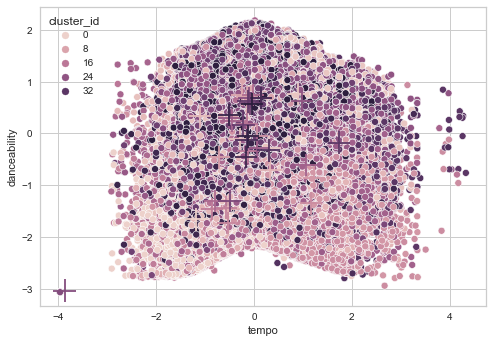

In [51]:
import seaborn as sns

sns.scatterplot(data=wines_clustered_sub_df,
               x='instrumentalness',
               y='danceability',
               hue='cluster_id')

# plot centroids
sns.scatterplot(data=cluster_center_sub_df,
               x="instrumentalness",
               y="danceability",
               hue='cluster_id',
                legend=False,
                # marker=u'8',
                marker='+',
                s=500,
               )

In [47]:
song2 = song_clustered[song_clustered['cluster_id']]

KeyError: "None of [Int64Index([ 2,  2, 25, 28, 35, 28, 28,  2, 35, 35,\n            ...\n            24, 23, 10, 36, 24, 39, 36, 24, 30,  8],\n           dtype='int64', length=130663)] are in the [columns]"